# Exemplo 1
* Dataframe: enem_sp
* Afirmação: Nota de redação do colegio(35151506.0) é igual à nota do estado de São Paulo (população)

* Qual teste usar? Por que?
n = 30
então será teste z

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
enem_sp = pd.read_csv('/content/drive/MyDrive/Cursos/Fatec /3°Semestre/EstatisticaAplicada/Dados/enem_2019_tratado.csv',
                      sep=',', encoding='iso-8859-1')

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
enem_sp.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [ ]:
nota_sp = enem_sp.NOTA_REDACAO.mean()

In [ ]:
colegio =  enem_sp.loc[enem_sp.CO_ESCOLA == 35151506.0]

In [ ]:
colegio.shape

(30, 28)

In [ ]:
import plotly.express as px

In [ ]:
grafico = px.box(colegio, y="NOTA_REDACAO")
grafico.show()

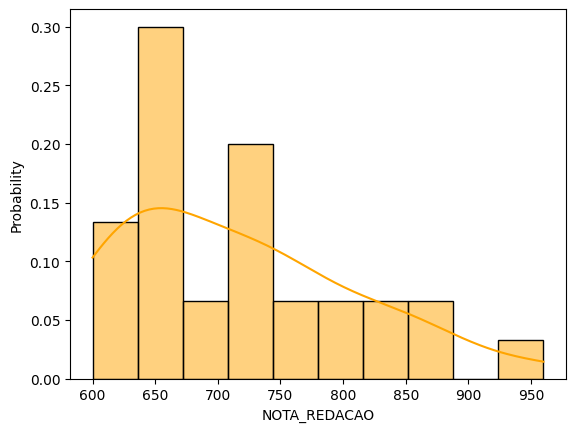

In [ ]:
import seaborn as sns
sns.histplot(colegio, x='NOTA_REDACAO', bins=10, color="orange", kde=True, stat="probability");

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

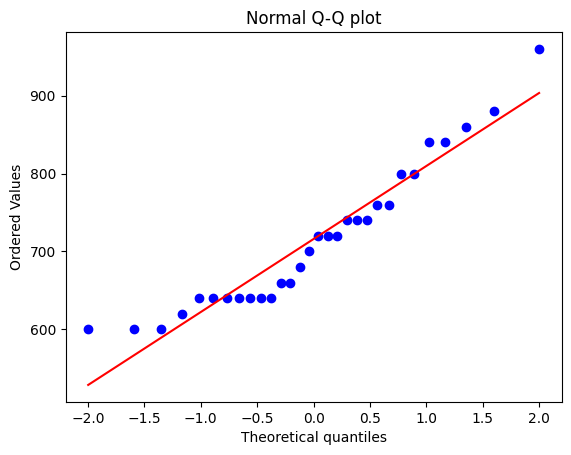

In [ ]:
stats.probplot(colegio['NOTA_REDACAO'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
# Teste Shapiro-Wilk
stats.shapiro(colegio.NOTA_REDACAO)

ShapiroResult(statistic=0.9185918569564819, pvalue=0.024661008268594742)

In [ ]:
import statsmodels
from statsmodels.stats.diagnostic import lilliefors

In [ ]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(colegio.NOTA_REDACAO, dist = 'norm')

(0.15794211976028916, 0.052842042822119004)

In [ ]:
from statsmodels.stats.weightstats import ztest

In [ ]:
stat, p = ztest(colegio['NOTA_REDACAO'], value=593.0183221986639, )
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p))

Estatística de teste: 7.18
p-valor: 7.173582254695279e-13


In [ ]:
colegio.NOTA_REDACAO.describe()

count     30.000000
mean     716.000000
std       93.867111
min      600.000000
25%      640.000000
50%      710.000000
75%      760.000000
max      960.000000
Name: NOTA_REDACAO, dtype: float64

## Teste T

In [ ]:
import scipy.stats as stats

In [ ]:
# Teste T para uma amostra
stat, p = stats.ttest_1samp(colegio['NOTA_REDACAO'], popmean=593.018)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: 7.18
p-valor: 6.72e-08


# Exemplo 2:
Afirmação: Média das notas do componente 5 das mulheres é igual à dos homens do colégio 35017632.0

In [ ]:
colegioy =  enem_sp.loc[enem_sp.CO_ESCOLA == 35017632.0]

In [ ]:
colegioy.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
37,"1,90E+11",Águas de Lindóia,18,M,1,branca,1,2,pública,35017632.0,...,537.1,Inglês,1.0,120.0,40.0,40.0,120.0,20.0,340.0,Sim
44,"1,90E+11",Águas de Lindóia,17,F,1,parda,1,2,pública,35017632.0,...,451.9,Inglês,1.0,140.0,120.0,140.0,160.0,160.0,720.0,Não
52,"1,90E+11",Águas de Lindóia,17,F,1,branca,1,2,pública,35017632.0,...,506.4,Espanhol,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Não
65,"1,90E+11",Águas de Lindóia,17,M,1,parda,1,2,pública,35017632.0,...,59.5,Inglês,1.0,120.0,120.0,120.0,120.0,40.0,520.0,Sim
79,"1,90E+11",Águas de Lindóia,18,F,1,branca,1,2,pública,35017632.0,...,510.6,Espanhol,1.0,120.0,120.0,120.0,140.0,140.0,640.0,Sim


In [ ]:
homens = colegioy.loc[colegioy.SEXO == "M"]
mulheres = colegioy.loc[colegioy.SEXO == "F"]

In [ ]:
homens.COMP5.describe()

count     13.000000
mean      72.307692
std       44.376016
min        0.000000
25%       40.000000
50%       80.000000
75%      100.000000
max      140.000000
Name: COMP5, dtype: float64

In [ ]:
mulheres.COMP5.describe()

count     28.000000
mean      86.428571
std       43.903453
min        0.000000
25%       60.000000
50%       80.000000
75%      120.000000
max      160.000000
Name: COMP5, dtype: float64

OUTLYERS

In [ ]:
# Homens
grafico = px.box(homens, y="COMP5")
grafico.show()

In [ ]:
#Mulheres
grafico = px.box(mulheres, y="COMP5")
grafico.show()

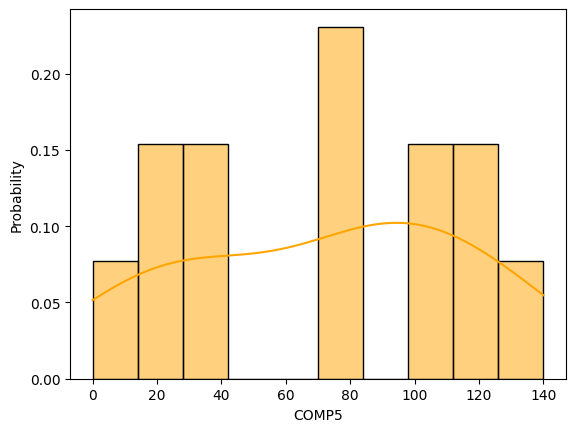

In [ ]:
sns.histplot(homens, x='COMP5', bins=10, color="orange", kde=True, stat="probability");

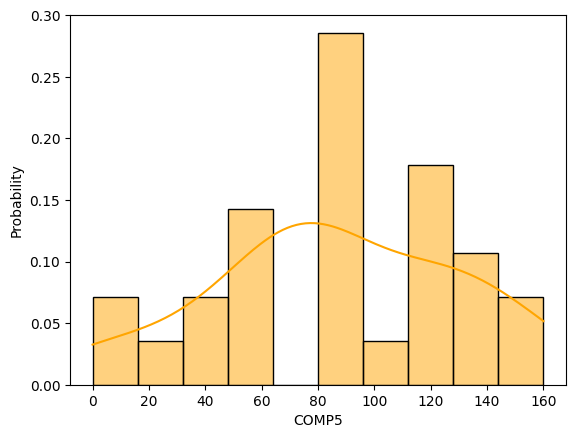

In [ ]:
sns.histplot(mulheres, x='COMP5', bins=10, color="orange", kde=True, stat="probability");

In [ ]:
stats.probplot(homens['COMP5'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

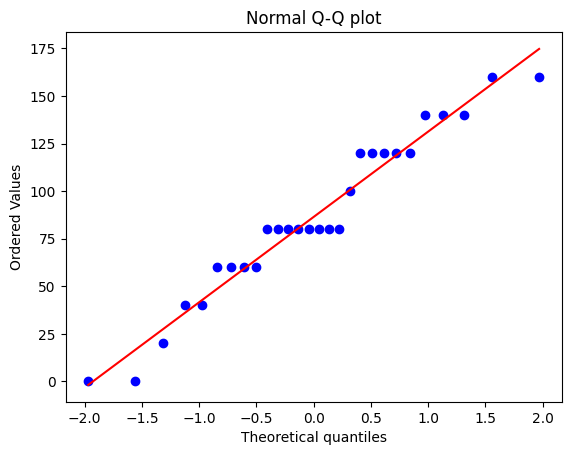

In [ ]:
stats.probplot(mulheres['COMP5'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [ ]:
# Teste Shapiro-Wilk
stats.shapiro(homens.NOTA_REDACAO)

ShapiroResult(statistic=0.9654623866081238, pvalue=0.8348963260650635)

In [ ]:
# Teste Shapiro-Wilk
stats.shapiro(mulheres.NOTA_REDACAO)

ShapiroResult(statistic=0.923387348651886, pvalue=0.04209158197045326)

In [ ]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(homens.COMP5, dist = 'norm')

(0.18419402116184486, 0.26208966678273116)

In [ ]:
# Teste Lilliefors (Kolmogorov_Sminorv)
statsmodels.stats.diagnostic.lilliefors(mulheres.COMP5, dist = 'norm')

(0.1653499849067943, 0.048205422522752915)

## TESTE T PARA DUAS **AMOSTRAS**

In [ ]:
# Teste T para duas amostras
stat,p = stats.ttest_ind(homens.COMP5, mulheres.COMP5, equal_var=False)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: -0.95
p-valor: 0.3512173126


# **TESTE Z para 2 amostras independentes**

In [ ]:
stat,p = ztest(homens.COMP5,mulheres.COMP5)
print('Estatística de teste: {}'.format(stat.round(2)))
print('p-valor: {}'.format(p.round(10)))

Estatística de teste: -0.96
p-valor: 0.339491895
